# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Creating lists to store the data

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_count = 0
set_count = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        city_data = requests.get(query_url + city).json()
        cloudiness.append(city_data['clouds']['all'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        humidity.append(city_data['main']['humidity'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        wind_speed.append(city_data['wind']['speed'])
        if city_count > 48:
            city_count = 1
            set_count += 1
            city_name.append(city)
        else:
            city_count += 1
            city_name.append(city)
    
        print(f'Processing Record {city_count} of set {set_count} | {city_data["name"]}')
    except KeyError as KeyError:
        print('City not found. Skipping...')
print('----------------------------------------------------------------')


Processing Record 1 of set 1 | Båtsfjord
Processing Record 2 of set 1 | Hilo
Processing Record 3 of set 1 | Port Alfred
Processing Record 4 of set 1 | Ploemeur
Processing Record 5 of set 1 | Avarua
City not found. Skipping...
Processing Record 6 of set 1 | Esso
Processing Record 7 of set 1 | Bredasdorp
Processing Record 8 of set 1 | Vargashi
Processing Record 9 of set 1 | Yumen
Processing Record 10 of set 1 | Rikitea
Processing Record 11 of set 1 | College
Processing Record 12 of set 1 | Punta Arenas
Processing Record 13 of set 1 | Galveston
Processing Record 14 of set 1 | Yellowknife
Processing Record 15 of set 1 | Cherskiy
Processing Record 16 of set 1 | Marquette
Processing Record 17 of set 1 | Albany
Processing Record 18 of set 1 | Ust'-Barguzin
Processing Record 19 of set 1 | Mogadouro
Processing Record 20 of set 1 | Saint George
Processing Record 21 of set 1 | Busselton
Processing Record 22 of set 1 | Bethel
Processing Record 23 of set 1 | Zhigansk
Processing Record 24 of set 1 |

City not found. Skipping...
Processing Record 40 of set 4 | Neiafu
Processing Record 41 of set 4 | Rio Claro
Processing Record 42 of set 4 | Paphos
Processing Record 43 of set 4 | Polyarnyye Zori
Processing Record 44 of set 4 | Lorengau
Processing Record 45 of set 4 | Mwanza
Processing Record 46 of set 4 | Saint-Augustin
Processing Record 47 of set 4 | São Filipe
Processing Record 48 of set 4 | Kirakira
Processing Record 49 of set 4 | Cervo
Processing Record 1 of set 5 | Kiama
Processing Record 2 of set 5 | Itaberá
City not found. Skipping...
Processing Record 3 of set 5 | Chimbote
Processing Record 4 of set 5 | Nguruka
Processing Record 5 of set 5 | Fortuna
Processing Record 6 of set 5 | Nome
Processing Record 7 of set 5 | Vardø
Processing Record 8 of set 5 | Baykit
Processing Record 9 of set 5 | Ambilobe
Processing Record 10 of set 5 | Ontario
Processing Record 11 of set 5 | Tura
City not found. Skipping...
Processing Record 12 of set 5 | Klaksvík
Processing Record 13 of set 5 | Nemu

Processing Record 33 of set 8 | Zhangjiakou
Processing Record 34 of set 8 | Karema
Processing Record 35 of set 8 | Hőgyész
Processing Record 36 of set 8 | Mahajanga
Processing Record 37 of set 8 | Karacaköy
Processing Record 38 of set 8 | Mariehamn
Processing Record 39 of set 8 | Santa Cruz de La Palma
Processing Record 40 of set 8 | Madimba
Processing Record 41 of set 8 | Acapulco de Juárez
City not found. Skipping...
Processing Record 42 of set 8 | Launceston
Processing Record 43 of set 8 | Jiaozuo
Processing Record 44 of set 8 | Bealanana
Processing Record 45 of set 8 | Laguna
Processing Record 46 of set 8 | Concordia Sagittaria
Processing Record 47 of set 8 | Ust'-Ordynskiy
Processing Record 48 of set 8 | Dickinson
Processing Record 49 of set 8 | Deniliquin
Processing Record 1 of set 9 | Grindavik
Processing Record 2 of set 9 | Yar-Sale
City not found. Skipping...
Processing Record 3 of set 9 | Saint-Joseph
Processing Record 4 of set 9 | Tigil'
Processing Record 5 of set 9 | Carahu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_dict = {
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

city_data_df = pd.DataFrame(data_dict)

city_data_df.sample(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
259,suleja,0,NG,1609831709,53,9.18,7.18,71.60,3.36
539,mahibadhoo,51,MV,1609831729,75,3.78,72.97,82.89,8.75
81,sozimskiy,84,RU,1609831695,96,59.74,52.25,14.14,5.82
460,mgandu,100,TZ,1609831723,99,-5.95,34.13,62.06,3.49
72,castro,100,BR,1609831547,92,-24.79,-50.01,60.13,2.98
90,limache,0,CL,1609831696,62,-33.02,-71.27,55.40,5.82
433,goderich,100,CA,1609831722,94,43.75,-81.72,32.00,4.70
193,sao filipe,100,CV,1609831703,74,14.90,-24.50,74.71,1.74
258,kiruna,39,SE,1609831709,92,67.86,20.23,21.20,5.82
386,bealanana,0,MG,1609831718,52,-14.55,48.73,78.46,3.33


In [5]:
city_data_df.to_csv(output_data_file, encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

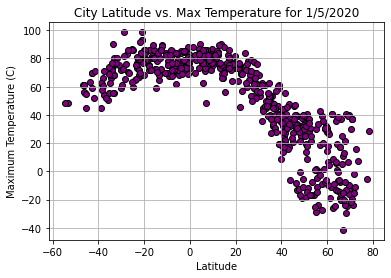

In [7]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/Latitude vs. Temperature.png")
plt.show()

In [ ]:
# In this chart, we see there is a negative correlation with the maximum temperature and the city latitude.

## Latitude vs. Humidity Plot

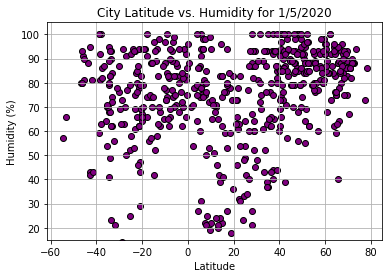

In [8]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

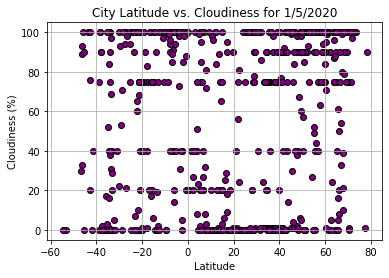

In [9]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

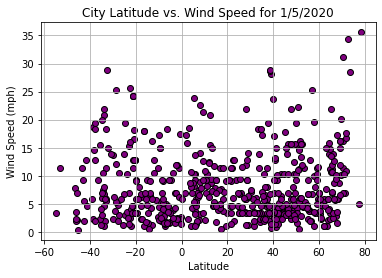

In [10]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [ ]:
#The second requirement is to run linear regression on each relationship. 
#This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude)
#and Southern Hemisphere (less than 0 degrees latitude):

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

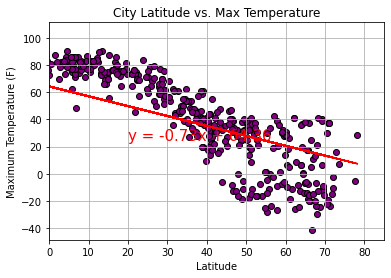

In [11]:
Latitude = city_data_df["Lat"]
Max_Temperature = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temperature)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.xlim(0,85)
plt.ylabel("Maximum Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

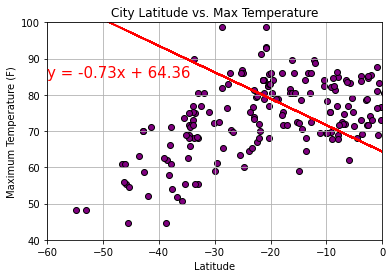

In [17]:
Latitude = city_data_df["Lat"]
Max_Temperature = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temperature)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Maximum Temperature (F)")
plt.ylim(40,100)
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-60,85),fontsize=15,color="red")
plt.show()

In [ ]:
###

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

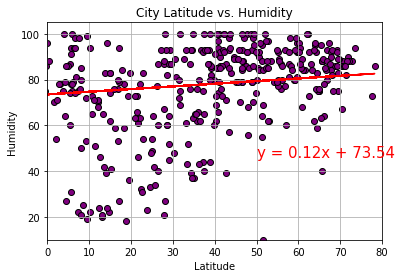

In [18]:
Latitude = city_data_df["Lat"]
Humidity = city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Humidity")
plt.ylim(10,105)
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(50,46),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

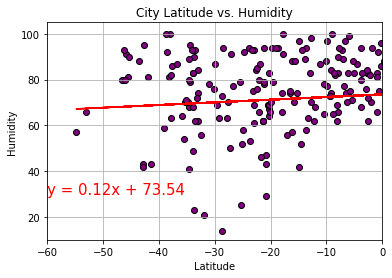

In [19]:
Latitude = city_data_df["Lat"]
Humidity = city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Humidity")
plt.ylim(10,105)
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-60,30),fontsize=15,color="red")
plt.show()


In [ ]:
###

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

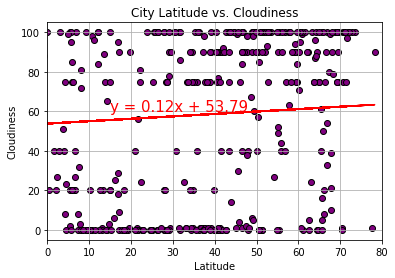

In [20]:
Latitude = city_data_df["Lat"]
Cloudiness = city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

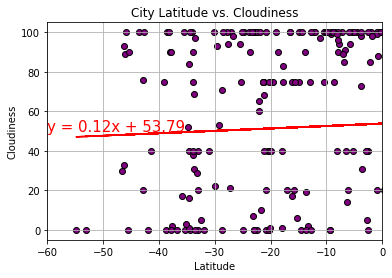

In [21]:
Latitude = city_data_df["Lat"]
Cloudiness = city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="red")
plt.show()

In [ ]:
###

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

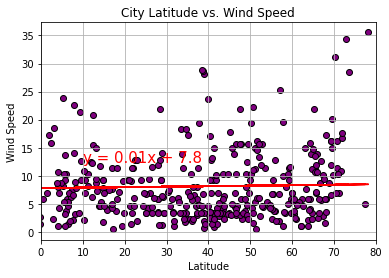

In [22]:
Latitude = city_data_df["Lat"]
Wind_Speed = city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(10,12.5),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

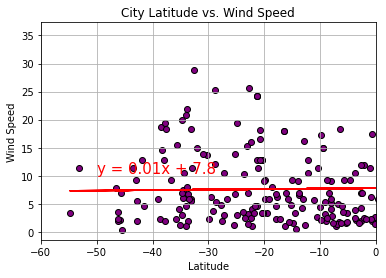

In [23]:
Latitude = city_data_df["Lat"]
Wind_Speed = city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-50,10.5),fontsize=15,color="red")
plt.show()

In [ ]:
###